# MoAE demo

This script shows how to use the bidspm BIDS app

- **Download**

  -  download the dataset from the FIL for the block design SPM tutorial


- **Preprocessing**

  - copies the necessary data from the raw to the derivative folder,
  - runs spatial preprocessing

    those are otherwise handled by the workflows:

  - ``bidsCopyInputFolder.m``
  - ``bidsSpatialPrepro.m``


- **Stats**

  This will run the subject level GLM and contrasts on it of the MoaE dataset

  - GLM specification + estimation
  - compute contrasts
  - show results

  that are otherwise handled by the workflows

  - ``bidsFFX.m``
  - ``bidsResults.m``

 .. note::

       Results might be a bit different from those in the SPM manual as some
       default options are slightly different in this pipeline
       (e.g use of FAST instead of AR(1), motion regressors added)


 type `bidspm help` or `bidspm('action', 'help')`
 or see this page: https://bidspm.readthedocs.io/en/stable/bids_app_api.html
 for more information on what parameters are obligatory or optional


 (C) Copyright 2022 Remi Gau


## Note: octave notebook

If you are running in an octave notebook.

### Graphic output

When using on Binder some of the SPM graphic output will not be generated, as SPM takes this environment as being command line only. 

### Running the demo locally

**If you are running this notebook locally AND if SPM is not the in Octave path**

Run the following cell with the appropriate path for your computer.

**Note:** SPM will need to be compiled to work for Octave for some parts of this demo to 

In [ ]:
% addpath('/home/remi/matlab/SPM/spm12');

## Initialize bidspm

In [1]:
clear;
clc;

this_dir = fileparts(mfilename('fullpath'));

addpath(fullfile(this_dir, '..', '..'));

bidspm();

MarsBaR analysis functions prepended to path
Loaded MarsBaR defaults from base defaults
Correct matlab/octave versions and added to the path!
Adding code to the path.
checking MATLAB / Octave version.
    bidspm>initBidspm at line 465 column 5
    bidspm at line 73 column 7

Checking dependencies
 Using SPM12 7771
Defaults settings have been modified by file(s):
  /home/remi/github/bidspm/src/defaults/spm_my_defaults.m
Modified fields: ui mat stats realign 
mv: cannot move '/home/remi/Documents/octave/spm12/toolbox/.' to '/home/remi/Documents/octave/spm12/toolbox/MACS/.': Device or resource busy
 We got all we need. Let's get to work.
____________________________________________________________
____________________________________________________________

______  _____ ______  _____ ______ ___  ___    
| ___ \|_   _||  _  \/  ___|| ___ \|  \/  |
| |_/ /  | |  | | | |\ `--. | |_/ /| .  . |   
| ___ \  | |  | | | | `--. \|  __/ | |\/| | 
| |_/ / _| |_ | |/ / /\__/ /| |    | |  | |   
\__

## Download the dataset

In [ ]:
download_data = true;
clean = false;
download_moae_ds(download_data, clean);

If the `tree` command is intalled on your computer, you view it:

In [3]:
!tree inputs/raw

inputs/raw
├── CHANGES
├── dataset_description.json
├── README
├── sub-01
│   ├── anat
│   │   └── sub-01_T1w.nii
│   └── func
│       ├── sub-01_task-auditory_bold.nii
│       └── sub-01_task-auditory_events.tsv
└── task-auditory_bold.json

3 directories, 7 files



## Preprocessing

This will run:

- copy the input dataset into a derivative one
- write a summary description of the data set
- do slice time correction (if not ignored and if slice timing is specified)
- realign the functional data (and apply unwarping - if not ignored)
- coregister the functional to the anatomical one
- segmentation the anatomical data
- skullstripping the anatomical data and creation of brain mask in native space
- normalization to SPM MNI space (IXI549Space)
- smooth the data

You can type `bidspm help` to get more info 
on the arguements and parameters needed by the bidspm app.

But it follows the general pattern of any bidsapp:

```matlab
bidspm(bids_dir, output_dir, analysis_level, ...)
```

In [8]:
bidspm help

Traceback (most recent call last):
  File "/home/remi/github/bidspm/env/bin/bidspm", line 5, in <module>
    from src.cli import main
ModuleNotFoundError: No module named 'src'
'/home/remi/github/bidspm/src/messages/bidspmHelp.m' is the file /home/remi/github/bidspm/src/messages/bidspmHelp.m


 General intro function for bidspm


 Note:

 - all parameters use ``snake_case``
 - most "invalid" calls simply initialize bidspm



 **BIDS APP CALLS**

 generic call:

 .. code-block:: matlab

   bidspm(bids_dir, output_dir, analysis_level, ...
           'action', 'some_action', ...
           'participant_label', {}, ...
           'dry_run', false, ...
           'bids_filter_file', struct([]), ...
           'verbosity', 2, ...
           'space', {'individual', 'IXI549Space'}, ...
           'options', struct([]))


 *Obligatory parameters*

 :param bids_dir:        path to a raw BIDS dataset
 :type  bids_dir:        path

 :param output_dir:      path where to output data
 :type  output_

In [9]:
% where the raw bids data is
bids_dir = fullfile(this_dir, 'inputs', 'raw');

% where we want to output it
% the data will be saved there in bidspm-preproc subfolder
output_dir = fullfile(this_dir, 'outputs', 'derivatives');

% the subject we want to analyse
subject_label = '01';



bidspm already initialized


Options are locked & loaded.


FOR TASK(s): auditory


Indexing dataset:
	/home/remi/github/bidspm/demos/MoAE/inputs/raw
Missing: /home/remi/github/bidspm/demos/MoAE/inputs/raw/participants.tsv

To silence this warning, consider adding a "participants.tsv" to your dataset.
See the function: bids.util.create_participants_tsv
See also this section of the BIDS specification:
	https://bids-specification.readthedocs.io/en/latest/03-modality-agnostic-files.html#participants-file
 Indexing subject: sub-01 [..]

WILL WORK ON SUBJECTS

	- 01




WORKFLOW: BIDS REPORT

 - running in dry run mode,
 - running SPM from the matlab command line only,
 - running under octave.
To silence this warning, you can run "warning('off', 'setGraphicWindow:noGraphicWindow')".
    errorHandling at line 61 column 5
    setGraphicWindow at line 41 column 5
    setUpWorkflow at line 70 column 3
    reportBIDS at line 25 column 15
    bidspm>preprocess at line 289 column 3
    bidspm at

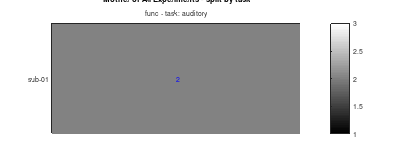

In [7]:
bidspm(bids_dir, output_dir, 'subject', ...
       'participant_label', {subject_label}, ... 
       'action', 'preprocess', ...
       'task', {'auditory'}, ...
       'ignore', {'unwarp', 'slicetiming'}, ...
       'space', {'IXI549Space'}, ...
       'fwhm', 6, ...
       'verbosity', 3);

## Stats

In [ ]:
addpath(fullfile(this_dir, '..', '..'));

subject_label = '01';

bids_dir = fullfile(this_dir, 'inputs', 'raw');

% the statistical output will be saved in a bidspm-stats subfolder
output_dir = fullfile(this_dir, 'outputs', 'derivatives');

% for the stats we need to specifcy where the preprocessed data is
preproc_dir = fullfile(output_dir, 'bidspm-preproc');

### BIDS stats model

The model specification as well as the contrasts to compute
are defined in a BIDS stats model:
https://bids-standard.github.io/stats-models/

In [ ]:
model_file = fullfile(pwd, 'models', 'model-MoAE_smdl.json');

In [1]:
!cat models/model-MoAE_smdl.json

{
  "Name": "auditory",
  "BIDSModelVersion": "1.0.0",
  "Description": "GLM and contrasts to compute for the FIL MoAE dataset",
  "Input": {
    "task": [
      "auditory"
    ],
    "space": [
      "IXI549Space"
    ]
  },
  "Nodes": [
    {
      "Level": "Run",
      "Name": "run_level",
      "GroupBy": [
        "run",
        "subject"
      ],
      "Model": {
        "X": [
          "trial_type.listening",
          "trans_?",
          "rot_?"
        ],
        "HRF": {
          "Variables": [
            "trial_type.listening"
          ],
          "Model": "spm"
        },
        "Type": "glm",
        "Options": {
          "HighPassFilterCutoffHz": 0.0078,
          "Mask": {
            "suffix": [
              "mask"
            ],
            "desc": [
              "brain"
            ]
          }
        },
        "Software": {
          "SPM": {
            "SerialCorrelation": "AR(1)"
          }
        }
      },
      "DummyContrasts": {
        "Test":

### Specify the result to show

Running bidspm for the stats will perform:

- model specification and estimation
- contrasts computation
- displaying the results

Hence we need to specify in the options which results
we want to view and how we want to save it.

The results of a given contrat can be saved as:
- an png image
- a SPM montage of slices
- a thresholded statistical map
- a binary mask
- an NIDM results zip file
- a table of labelled activations


In [2]:
% nodeName corresponds to the name of the Node in the BIDS stats model
opt.results(1).nodeName = 'run_level';
% this results corresponds to the name of the contrast in the BIDS stats model
opt.results(1).name = {'listening_1'};

% cluster forming threshold
opt.results(1).p = 0.05;
% type of multiple comparison correction
opt.results(1).MC = 'FWE';

% Specify how you want your output
% (all the following are on false by default)
opt.results(1).png = true();
opt.results(1).csv = true();
opt.results(1).binary = true();

opt.results(1).montage.do = true();
opt.results(1).montage.background = struct('suffix', 'T1w', ...
                                           'desc', 'preproc', ...
                                           'modality', 'anat');
opt.results(1).montage.slices = -4:2:16;
opt.results(1).nidm = true();

% We can do the same for other contrasts
opt.results(2).nodeName = 'run_level';
opt.results(2).name = {'listening_inf_baseline'};

opt.results(2).p = 0.01;
% cluster size threshold
opt.results(2).k = 10;
opt.results(2).MC = 'none';

opt.results(2).csv = true;
% atlas to use to label activations
opt.results(2).atlas = 'AAL';

In [ ]:
bidspm(bids_dir, output_dir, 'subject', ...
       'participant_label', {subject_label}, ...
       'action', 'stats', ...
       'preproc_dir', preproc_dir, ...
       'model_file', model_file, ...
       'options', opt, ...
       'fwhm', 6);